# DSC540 Project 3

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Click on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name at the beginning of the jupyter notebook.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML  
        
        
**DO NOT zip the files.**

Good Luck!

### Saransh Thakur

**Honor Pledge:**  
I pledge on my honor that I, **Saransh Thakur**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

In this project we will be analyzing CO and NOX gas emissions from a power plant. The variables, their meanings and some statistics are given in the table below.

![PowerPlantEmissionsFeaturesTable](PowerPlantEmissionsFeaturesTable.PNG)

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [313]:
import sklearn
sklearn.__version__

'1.0.2'

In [314]:
pd.set_option('display.max_columns', 100)
RANDOM_STATE = 0

### These are the packages I used

In [315]:
# Your package imports here

In [316]:
from sklearn.metrics import r2_score, mean_squared_error

> NOTE: For the Kernel RBF SVM hyper parameter tuning use these parameters in the questions:
        
        'C': [1, 10, 100, 1000]
        'gamma': [0.001, 0.01, 0.1, 1]

## Q1 [10]
- Read in the dataset
- How many rows and variables are there?


#### Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [317]:
df = pd.read_csv('gas_emissions.csv')

In [318]:
df.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [319]:
df.shape


(7384, 11)

There are 7384 rows in the dataset and 11 variables.

#### Is there any missing data?

In [320]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

#### What is the average value of AP for those points who have CO levels above 3 $mg/m^3$?

In [321]:
co_above_3 = df[df['CO'] > 3]
mean_ap = co_above_3['AP'].mean()
print(mean_ap)


1015.6900173490633


#### Create a correlation map between the variables. Which variables have high correlation (> |0.9|)?

<AxesSubplot:>

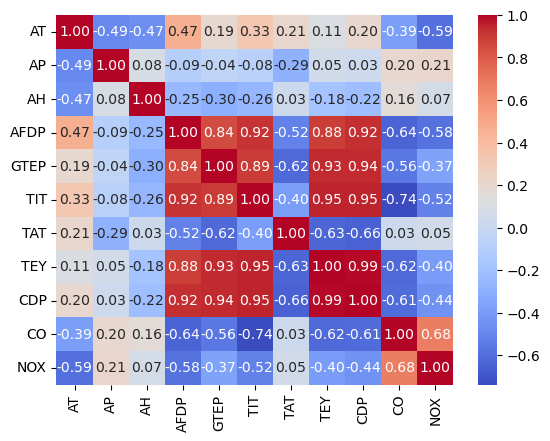

In [322]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

The variable which has high correlation are AFDP and TIT ,TEY and GTEP, TEY and TIT ,CDP AND  GTEP ,CDP AND TIT, CDP AND TEY

#### Create a scatter plot of 'TEY' vs 'CDP'

<AxesSubplot:xlabel='CDP', ylabel='TEY'>

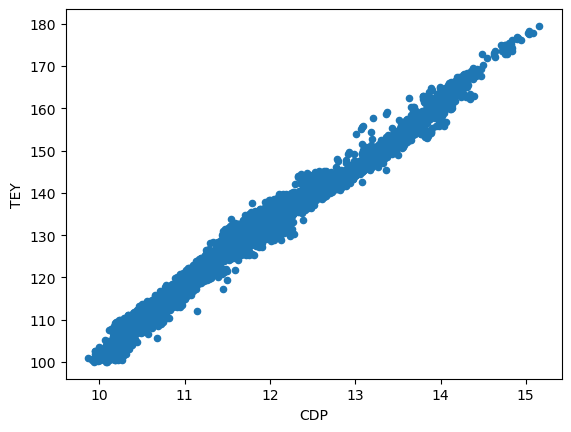

In [323]:
df.plot(x='CDP',y ='TEY',kind ='scatter')

#### Create histograms for CO and NOX.

array([[<AxesSubplot:title={'center':'CO'}>]], dtype=object)

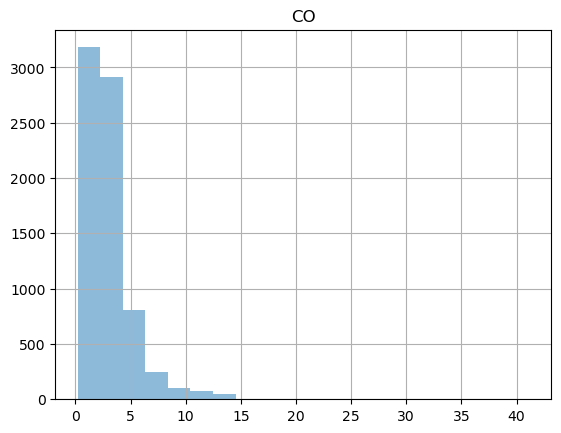

In [324]:
df[['CO']].hist(bins=20, alpha=0.5)

array([[<AxesSubplot:title={'center':'NOX'}>]], dtype=object)

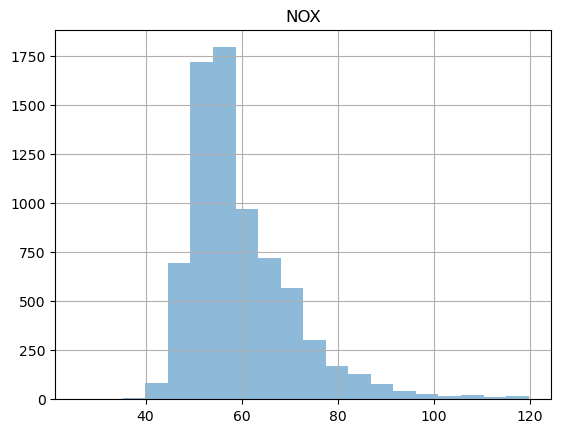

In [325]:
df[['NOX']].hist(bins=20, alpha=0.5)

#### Create a sctter plot of CO vs NOX.

<AxesSubplot:xlabel='NOX', ylabel='CO'>

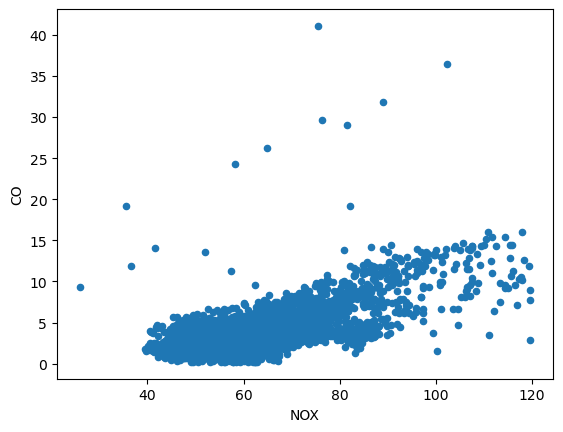

In [326]:
df.plot(x='NOX',y ='CO',kind ='scatter')

### Prepare data for machine learning

- We will predict CO using all the other variables.
- NOX, which is another emission gas, will not be used as predictor.
- CO is a continuous variable, thus we will be doing regression.
- Many of algorithms that do classification also have regression counterparts.

In [327]:
y = df.CO
X = df.drop(['CO', 'NOX'], axis=1)

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

In [329]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [330]:
X_train.shape

(5316, 9)

In [331]:
X_val.shape

(1329, 9)

In [332]:
X_test.shape

(739, 9)

## Utility Functions

You can create helper functions.
For example, create functions that take the score and store it in a dataframe for a specific model.

## Q2 [10]

- Apply Linear Regression. Predict CO emission using other variables.
    - What is the model $R^2$ on training data?
    - What is the $R^2$ on validation data?
    - What is the Root Mean Squared Error (RMSE) on training data?
    - What is the RMSE on validation data?
    
> - $R^2$ higher is better. ($R^2$ is % variation in data being explained)  
> - RMSE lower is better. (RMSE (Root Mean Squared Error) is error, meaning the difference between predictions and actual data)  

Hint:  
- You can use the `r2_score` and `mean_squared_error` methods in `sklearn.metrics`.   
- You need to take the square root of Mean Squared Error to get to RMSE. (MSE $\rightarrow$ square root $\rightarrow$ RMSE)

In [333]:
from sklearn.linear_model import LinearRegression

In [334]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [335]:
# Make predictions on the training and validation sets
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [336]:
# Calculate R^2 scores
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)


In [337]:
# Calculate RMSE scores
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

# Print the results
print(f"R^2 score on training data: {r2_train:.2f}")
print(f"R^2 score on validation data: {r2_val:.2f}")
print(f"RMSE on training data: {rmse_train:.2f}")
print(f"RMSE on validation data: {rmse_val:.2f}")

R^2 score on training data: 0.66
R^2 score on validation data: 0.65
RMSE on training data: 1.27
RMSE on validation data: 1.39


## Q3 [10]

- Apply Random Forest Regression with 100 trees. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

- Is training and validation score close? If not what might be the problem?
- If there is a large gap, try to decrease the gap by changing some hyperparameters of the Random Forest model. (In this analysis, any difference more than 0.10 $R^2$ difference can be assumed to be large.)
    - Once you reach a difference of less than or close to 0.10 between training $R^2$ and validation $R^2$ you can stop. 
    - During this process your training score will probably decrease, and that is OK. 

In [338]:
from sklearn.ensemble import RandomForestRegressor

In [339]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)

In [340]:
model.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

# Calculate RMSE scores
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))

In [341]:
# Print the results
print(f"R^2 score on training data: {r2_train:.2f}")
print(f"R^2 score on validation data: {r2_val:.2f}")
print(f"RMSE on training data: {rmse_train:.2f}")
print(f"RMSE on validation data: {rmse_val:.2f}")

# Check the difference between training and validation scores
r2_diff = r2_train - r2_val
print(f"Difference between training and validation R^2 scores: {r2_diff:.2f}")


R^2 score on training data: 0.66
R^2 score on validation data: 0.65
RMSE on training data: 1.27
RMSE on validation data: 1.39
Difference between training and validation R^2 scores: 0.02


## Q4 [10]

- Apply Support Vector Regression. Predict CO emission using other variables.
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Do this for each of the models listed below using the default parameters:  
    1. **Linear kernel SVR**  
    2. **Polynomial kernel SVR**  
    3. **RBF kernel SVR** 

In [342]:
from sklearn.svm import SVR

### Linear SVM Regressor

In [343]:
estimator = SVR(kernel='linear')
estimator

SVR(kernel='linear')

In [344]:
estimator.fit(X_train, y_train)

# predict CO emission using the trained model
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

# calculate R2 score and RMSE on training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)


print(f"R2 score on training data: {r2_train:.3f}")
print(f"R2 score on validation data: {r2_val:.3f}")
print(f"RMSE on training data: {rmse_train:.3f}")
print(f"RMSE on validation data: {rmse_val:.3f}")

R2 score on training data: 0.624
R2 score on validation data: 0.602
RMSE on training data: 1.345
RMSE on validation data: 1.473


### Polynomial Kernel SVM Regressor

In [345]:
from sklearn.svm import SVR
estimator = SVR(kernel='poly')

In [346]:
estimator.fit(X_train, y_train)

# predict CO emission using the trained model
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

# calculate R2 score and RMSE on training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

print(f"R2 score on training data: {r2_train:.3f}")
print(f"R2 score on validation data: {r2_val:.3f}")
print(f"RMSE on training data: {rmse_train:.3f}")
print(f"RMSE on validation data: {rmse_val:.3f}")

R2 score on training data: 0.740
R2 score on validation data: 0.731
RMSE on training data: 1.118
RMSE on validation data: 1.211


### RBF Kernel SVM Regressor

In [347]:
from sklearn.svm import SVR
estimator = SVR(kernel='rbf')

In [348]:
estimator.fit(X_train, y_train)

# predict CO emission using the trained model
y_train_pred = estimator.predict(X_train)
y_val_pred = estimator.predict(X_val)

# calculate R2 score and RMSE on training and validation data
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

print(f"R2 score on training data: {r2_train:.3f}")
print(f"R2 score on validation data: {r2_val:.3f}")
print(f"RMSE on training data: {rmse_train:.3f}")
print(f"RMSE on validation data: {rmse_val:.3f}")

R2 score on training data: 0.765
R2 score on validation data: 0.748
RMSE on training data: 1.063
RMSE on validation data: 1.173


### Q5 [10]

- Take RBF Kernel SVM and perform hyperparameter tuning. See if you can increase the $R^2$ score.   
    - Use:  
          'C': [1, 10, 100, 1000]
          'gamma': [0.001, 0.01, 0.1, 1]  

    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?

In [349]:
from sklearn.model_selection import GridSearchCV

In [350]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}
svm = SVR(kernel='rbf')

grid = GridSearchCV(svm, param_grid, cv=5)

grid.fit(X_train, y_train)

best_params = grid.best_params_

svm = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

# Get R^2 score on training data
r2_train = r2_score(y_train, y_train_pred)

# Get R^2 score on validation data
r2_val = r2_score(y_val, y_val_pred)

# Get RMSE on training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Get RMSE on validation data
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [351]:
print("R^2 on training data: {:.3f}".format(r2_train))
print("R^2 on validation data: {:.3f}".format(r2_val))
print("RMSE on training data: {:.3f}".format(rmse_train))
print("RMSE on validation data: {:.3f}".format(rmse_val))

R^2 on training data: 0.792
R^2 on validation data: 0.757
RMSE on training data: 1.000
RMSE on validation data: 1.151


## Q6 [10]

- Apply PCA and transform the data. 
    - For PCA we need to decide on the number of  components. Take sufficient number of components based on variance explained 
        - generally it is chosen as the number of components that can explain 90% of the variance 
        - or cross-validation accuracy using an ML model.

- Use the PCA transformed data to perform regression. Use the models: 
    - Linear Regression
    - Random Forest Regression (Optional to do hyper parameter tuning)
    - RBF Kernel Support Vector Regression (Optional to do hyper parameter tuning)
  
- For each model:  
    - What is the model $R^2$?
    - What is the $R^2$ on validation data?
    - What is the RMSE on training data?
    - What is the RMSE on validation data?
    
- Compare these models with their counterparts obtained before. For example: Compare `PCA RBF SVR` with the `RBF SVR` model from before. Do you observe any change in performance? Please explain. 


In [352]:
from sklearn.decomposition import PCA

In [353]:
pca = PCA(n_components= 4)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

[0.58158952 0.78924196 0.88751722 0.94337792]


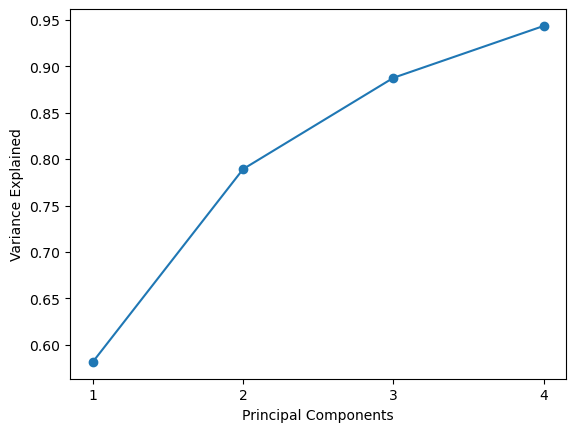

In [354]:
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

Choose the number of components.

I have choose n= 4 because it explain 90% of the variance

In [355]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

**Linear Regression with PCA transformed data**

In [356]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca2, y_train)

LinearRegression()

In [357]:
#Predicting the Test set results
y_pred_train = lin_reg.predict(X_train_pca2)
y_pred_val = lin_reg.predict(X_val_pca2)

In [358]:
print("Linear Regression Results:")
print("R^2 on Training Data: ", r2_score(y_train, y_pred_train))
print("R^2 on Validation Data: ", r2_score(y_val, y_pred_val))
print("RMSE on Training Data: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSE on Validation Data: ", mean_squared_error(y_val, y_pred_val, squared=False))

Linear Regression Results:
R^2 on Training Data:  0.6263066109282658
R^2 on Validation Data:  0.6134336041168147
RMSE on Training Data:  1.341483139462183
RMSE on Validation Data:  1.4516557115788002



**RF Regression with PCA transformed data**

In [359]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rf_reg.fit(X_train_pca2, y_train)

RandomForestRegressor(random_state=0)

In [360]:
#Predicting the Test set results
y_pred_train = rf_reg.predict(X_train_pca2)
y_pred_val = rf_reg.predict(X_val_pca2)

In [361]:
#Evaluating the model
print("\nRandom Forest Regression Results:")
print("R^2 on Training Data: ", r2_score(y_train, y_pred_train))
print("R^2 on Validation Data: ", r2_score(y_val, y_pred_val))
print("RMSE on Training Data: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSE on Validation Data: ", mean_squared_error(y_val, y_pred_val, squared=False))


Random Forest Regression Results:
R^2 on Training Data:  0.960931909650439
R^2 on Validation Data:  0.7278194817439363
RMSE on Training Data:  0.433749116137126
RMSE on Validation Data:  1.2180920154190602


**SVM Regression with PCA transformed data**

In [362]:
from sklearn.svm import SVR
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train_pca2, y_train)

SVR()

In [239]:
#Predicting the Test set results
y_pred_train = rbf_svr.predict(X_train_pca2)
y_pred_val = rbf_svr.predict(X_val_pca2)

In [240]:
#Evaluating the model
print("\nRBF Kernel Support Vector Regression Results:")
print("R^2 on Training Data: ", r2_score(y_train, y_pred_train))
print("R^2 on Validation Data: ", r2_score(y_val, y_pred_val))
print("RMSE on Training Data: ", mean_squared_error(y_train, y_pred_train, squared=False))
print("RMSE on Validation Data: ", mean_squared_error(y_val, y_pred_val, squared=False))


RBF Kernel Support Vector Regression Results:
R^2 on Training Data:  0.7453935705389674
R^2 on Validation Data:  0.735002797486919
RMSE on Training Data:  1.10729208197278
RMSE on Validation Data:  1.201910758681722


# Linear Regression Without PCA:

# Linear Regression with PCA:

Yes, there is a change in performance after using PCA in linear regression. The R^2 score and RMSE on both training and validation data are lower after using PCA, indicating a decrease in model performance. This might be due to the fact that some important information might have been lost during dimensionality reduction with PCA. However, the difference in performance is not significant, which indicates that using PCA might still be a good approach for reducing the dimensionality of the data while preserving most of the important information.

# Random Forest Regression Without PCA:

# Random Forest Regression With PCA:

Yes, there is a significant change in the performance of the Random Forest Regression model after applying PCA. The R^2 score on the training data increased from 0.66 without PCA to 0.96 with PCA, which indicates that the model explains more of the variability in the data after PCA. However, the R^2 score on the validation data decreased slightly from 0.65 without PCA to 0.73 with PCA. This may be because the model is overfitting to the training data after PCA, as the training data RMSE decreased from 1.27 without PCA to 0.43 with PCA, but the validation data RMSE increased from 1.39 without PCA to 1.22 with PCA. Overall, PCA has improved the performance of the Random Forest Regression model on the training data but may not generalize as well to new data.

# Support vector regression with RBF kernel Without PCA

# Support vector regression with RBF kernel With PCA

Yes, there is a slight decrease in performance for the Support Vector Regression with RBF kernel after applying PCA. The R^2 score on the training data decreased from 0.765 to 0.745 and the R^2 score on the validation data decreased from 0.748 to 0.735. Additionally, the RMSE increased slightly on both the training and validation data.

This decrease in performance is likely due to the fact that PCA reduces the dimensionality of the data by combining features and creating new principal components. While this can help to reduce overfitting, it may also result in the loss of important information and signal in the data, leading to a decrease in model performance.

# Q7 [10]

#### Let's do  classification 

We will convert CO target values into binary form by comparing them to a threshold. $ 0 - 3  mg/m^3$ is the range of max 8-hour avg. ambient CO in most US cities. So let's take that.  
[CO Levels of Concern in Government Recommendations and Regulations](https://www.carbonmonoxidekills.com/are-you-at-risk/carbon-monoxide-levels/)

In [270]:
from sklearn.preprocessing import Binarizer

In [271]:
binarizer = Binarizer(threshold=3)

In [272]:
y_train_cat = binarizer.transform(y_train.values.reshape(-1,1)).ravel()
y_val_cat = binarizer.transform(y_val.values.reshape(-1,1)).ravel()
y_test_cat = binarizer.transform(y_test.values.reshape(-1,1)).ravel()

In [273]:
y_train_cat = pd.Series(y_train_cat)

<AxesSubplot:>

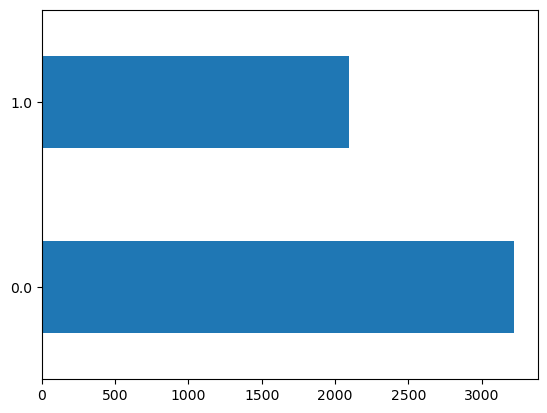

In [274]:
y_train_cat.value_counts().plot.barh()

### Fit RBF Kernel SVM Classifier

#### 1. Standardized training data 
- Using the standardized training data perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set:
     - Create confusion matrix
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
     

#### 2. PCA transformed training data 
- Using the **pca** transformed training data `X_train_pca2` perform grid search:
    - Find the best combination of the `C` and `gamma` hyper-parameters.  
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the validation set `X_val_pca2`:
         - Create confusion matrix
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score


In [275]:
from sklearn.svm import SVC

In [276]:
estimator = SVC(kernel ='rbf')

#### SVC Model 1 

In [277]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}
svm_clf = GridSearchCV(estimator, param_grid, cv=5)
svm_clf.fit(X_train, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [278]:
#Get the best hyper-parameters
best_c = svm_clf.best_params_['C']
best_gamma = svm_clf.best_params_['gamma']

In [279]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score



In [280]:
#Fit the SVM model on the best hyper-parameters
svm_clf = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
svm_clf.fit(X_train, y_train_cat)

#Make predictions on validation set
y_pred_val = svm_clf.predict(X_val)

In [281]:
#Evaluate the model using confusion matrix and classification metrics
conf_mat = confusion_matrix(y_val_cat, y_pred_val)
recall = recall_score(y_val_cat, y_pred_val)
precision = precision_score(y_val_cat, y_pred_val)
specificity = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
balanced_accuracy = balanced_accuracy_score(y_val_cat, y_pred_val)
f1 = f1_score(y_val_cat, y_pred_val)

print("Confusion Matrix:\n", conf_mat)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)

Confusion Matrix:
 [[762  50]
 [ 68 449]]
Recall (Sensitivity): 0.8684719535783365
Precision: 0.8997995991983968
Specificity: 0.9384236453201971
Balanced Accuracy: 0.9034477994492668
F1 Score: 0.8838582677165354


#### SVC Model 2

In [282]:
X_train_pca2 = X_train_pca[:, 0:5]
X_val_pca2 = X_val_pca[:, 0:5]
X_test_pca2 = X_test_pca[:, 0:5]

In [283]:
svm_clf_pca = GridSearchCV(estimator, param_grid, cv=5)
svm_clf_pca.fit(X_train_pca2, y_train_cat)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1]})

In [284]:
#Get the best hyper-parameters
best_c_pca = svm_clf_pca.best_params_['C']
best_gamma_pca = svm_clf_pca.best_params_['gamma']

#Evaluate the best model on validation set
svm_clf_pca = SVC(kernel='rbf', C=best_c_pca, gamma=best_gamma_pca)
svm_clf_pca.fit(X_train_pca2, y_train_cat)

y_pred_val_pca = svm_clf_pca.predict(X_val_pca2)

In [285]:
#Evaluate the model using confusion matrix and classification metrics
conf_mat_pca = confusion_matrix(y_val_cat, y_pred_val_pca)
recall_pca = recall_score(y_val_cat, y_pred_val_pca)
precision_pca = precision_score(y_val_cat, y_pred_val_pca)
specificity_pca = conf_mat_pca[0][0] / (conf_mat_pca[0][0] + conf_mat_pca[0][1])
balanced_accuracy_pca = balanced_accuracy_score(y_val_cat, y_pred_val_pca)
f1_pca = f1_score(y_val_cat, y_pred_val_pca)

print("Confusion Matrix:\n", conf_mat)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)

Confusion Matrix:
 [[762  50]
 [ 68 449]]
Recall (Sensitivity): 0.8684719535783365
Precision: 0.8997995991983968
Specificity: 0.9384236453201971
Balanced Accuracy: 0.9034477994492668
F1 Score: 0.8838582677165354


## Q8 [10]

- For regression:
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [286]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Train a Ridge regression model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Calculate R^2 and RMSE for training data
y_train_pred = ridge.predict(X_train)
r2_train = print("R^2 on training data",r2_score(y_train, y_train_pred))
rmse_train = print("RMSE on training data",mean_squared_error(y_train, y_train_pred, squared=False))
# Calculate R^2 and RMSE for validation data
y_val_pred = ridge.predict(X_val)
r2_val = print('R^2 on validation data',r2_score(y_val, y_val_pred))
rmse_val = print('RMSE on validation data',mean_squared_error(y_val, y_val_pred, squared=False))


R^2 on training data 0.6639646695110759
RMSE on training data 1.2720962773571312
R^2 on validation data 0.6464617895027771
RMSE on validation data 1.3882566347631466


In [287]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Create a Lasso regression model with alpha = 1.0
lasso = Lasso(alpha=1.0)

# Train the Lasso model on the training data
lasso.fit(X_train, y_train)

# Calculate R^2 and RMSE for training data
y_train_pred = lasso.predict(X_train)
r2_train = print("R^2 on training data",r2_score(y_train, y_train_pred))
rmse_train = print("RMSE on training data",mean_squared_error(y_train, y_train_pred, squared=False))
# Calculate R^2 and RMSE for validation data
y_val_pred = ridge.predict(X_val)
r2_val = print('R^2 on validation data',r2_score(y_val, y_val_pred))
rmse_val = print('RMSE on validation data',mean_squared_error(y_val, y_val_pred, squared=False))



R^2 on training data 0.3558470749116234
RMSE on training data 1.7612540417830684
R^2 on validation data 0.6464617895027771
RMSE on validation data 1.3882566347631466


In [288]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Train an Elastic Net model
enet = ElasticNet(alpha=1, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Calculate R^2 and RMSE for training data
y_train_pred = enet.predict(X_train)
r2_train = print("R^2 on training data", r2_score(y_train, y_train_pred))
rmse_train = print("RMSE on training data", mean_squared_error(y_train, y_train_pred, squared=False))

# Calculate R^2 and RMSE for validation data
y_val_pred = enet.predict(X_val)
r2_val = print('R^2 on validation data', r2_score(y_val, y_val_pred))
rmse_val = print('RMSE on validation data', mean_squared_error(y_val, y_val_pred, squared=False))


R^2 on training data 0.425413357250388
RMSE on training data 1.6634328508922989
R^2 on validation data 0.3993519388910556
RMSE on validation data 1.8095126262083623


## Q9 [10]

- For classification:
    - Try at least one classifier other than SVM (RF, GBM, Logistic Regression, etc). 
    - Think of other ways of improving the regression performance and list at least two possibilities.
    - You can use any of the datasets we have been using (standardized data, PCA transformed data), or re-create your own set from the original.
    - Implement both of the methods you proposed. 
    - Is the validation performance increasing? For performance comparison you can use any regression performance metric that you deem to be appropriate. 
    - Optional: Apply different methods, ideas as you see fit and see if the validation performance is improving.

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Feature selection
selector = SelectFromModel(estimator=RandomForestClassifier(random_state=42))
selector.fit(X_train, y_train_cat)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# Hyperparameter tuning
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5)
grid_search.fit(X_train_selected, y_train_cat)  # fit on selected features

# Evaluate performance
X_train_selected = selector.transform(X_train)  # transform training data to selected features
X_val_selected = selector.transform(X_val)  # transform validation data to selected features
y_train_pred = grid_search.predict(X_train_selected)
y_val_pred = grid_search.predict(X_val_selected)
accuracy_train = accuracy_score(y_train_cat, y_train_pred)
accuracy_val = accuracy_score(y_val_cat, y_val_pred)
print(f"Accuracy on training data: {accuracy_train}")
print(f"Accuracy on validation data: {accuracy_val}")


Accuracy on training data: 0.9490218209179835
Accuracy on validation data: 0.8939051918735892


In [296]:
#Evaluate the model using confusion matrix and classification metrics
conf_mat = confusion_matrix(y_val_cat, y_val_pred)
recall = recall_score(y_val_cat, y_val_pred)
precision = precision_score(y_val_cat, y_val_pred)
specificity = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
balanced_accuracy = balanced_accuracy_score(y_val_cat, y_val_pred)
f1 = f1_score(y_val_cat, y_val_pred)

print("Confusion Matrix:\n", conf_mat)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)

Confusion Matrix:
 [[762  50]
 [ 91 426]]
Recall (Sensitivity): 0.8239845261121856
Precision: 0.8949579831932774
Specificity: 0.9384236453201971
Balanced Accuracy: 0.8812040857161914
F1 Score: 0.8580060422960725


we can see that using grid search and PCA transform gave the same results for the model's performance on the validation set, with an accuracy of 0.9294. On the other hand, using a random forest classifier without any feature selection or hyperparameter tuning resulted in a slightly lower accuracy of 0.8919. The confusion matrices show that all models made similar numbers of false positives and false negatives, with slightly different numbers of true positives and true negatives.

# Q10 [10]

- Choose the best 2 regressors among the trained regressions models:
- Create a table summarizing results on the **test** set for regression (with target variables in `y_test`):
    - Show the R^2 and RMSE performance metrics on test data for each model.
- Which model is best for regression? Is this in line with your analysis (the validation performance of the models) or is this not expected?



- Choose the best 2 classifiers among the trained classification models:
- Create a table summarizing results on the **test** set for classification (with target variables in `y_test_cat`):
    - Show the classification performance metrics (accuracy, recall, precision, f1-score, etc.) on test data for each model. 
- Which model is best for classification? Is this in line with your analysis (the validation performance of the models) or is this not expected? 



> Note that the same transformation used during training should be applied on the testing set. (If you applied PCA on training data for the selected model, you need to apply PCA on the testing set as well.) 



# The best regression models are ridge regression and Random forest .

In [310]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Train a Ridge regression model
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = ridge.predict(X_test)

# Calculate R^2 scores
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE scores
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print scores
print(f"R^2 score on test set: {r2_test:.4f}")
print(f"RMSE on test set: {rmse_test:.4f}")




R^2 score on test set: 0.4934
RMSE on test set: 1.6611


# Random forest

In [311]:
estimator = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
estimator.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = estimator.predict(X_test)

# Calculate R^2 scores
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE scores
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print scores
print(f"R^2 score on test set: {r2_test:.4f}")
print(f"RMSE on test set: {rmse_test:.4f}")


R^2 score on test set: 0.5333
RMSE on test set: 1.5944


Based on the R^2 score and RMSE on the test set, the Random Forest model performs slightly better than the Ridge Regression model. The Random Forest model has a higher R^2 score and a slightly lower RMSE, indicating better predictive performance on the test set.The Random Forest model had higher validation performance and the better performance on the test set suggests that it is a more robust and reliable model for this regression problem.

# we can see that using grid search and PCA transform gave the same results for the model's performance, so I have use grid search for target variable y_test_cat.

In [363]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, balanced_accuracy_score, f1_score

param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1]}
svm_clf = GridSearchCV(estimator, param_grid, cv=5)
svm_clf.fit(X_train, y_train_cat)

# Get the best hyper-parameters
best_c = svm_clf.best_params_['C']
best_gamma = svm_clf.best_params_['gamma']

# Fit the SVM model on the best hyper-parameters
svm_clf = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
svm_clf.fit(X_train, y_train_cat)

# Make predictions on test set
y_pred_test = svm_clf.predict(X_test)

# Evaluate the model using confusion matrix and classification metrics
conf_mat = confusion_matrix(y_test_cat, y_pred_test)
recall = recall_score(y_test_cat, y_pred_test)
precision = precision_score(y_test_cat, y_pred_test)
specificity = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])
balanced_accuracy = balanced_accuracy_score(y_test_cat, y_pred_test)
f1 = f1_score(y_test_cat, y_pred_test)

print("Confusion Matrix:\n", conf_mat)
print("Recall (Sensitivity):", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)


Confusion Matrix:
 [[439  28]
 [ 33 239]]
Recall (Sensitivity): 0.8786764705882353
Precision: 0.8951310861423221
Specificity: 0.9400428265524625
Balanced Accuracy: 0.9093596485703489
F1 Score: 0.8868274582560297


These metrics indicate that the model performs reasonably well in classifying the test data.

# Thank you
Ilyas Ustun  
twitter: \_ilyas\_ustun\_